# Conceptos fundamentales sobre Redes Neuronales y su implementación en Python

Ayudante: Francisco Tassara H.

Material basado en las clases practicas de Jorge Ávila C. para este mismo curso en su versión del 2020. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Conceptos basicos

## Problemas de Clasifición y Regresión

* Clasificación

Cuando usamos clasificación, el resultado es una clase, entre un número limitado de clases. Con clases nos referimos a categorías arbitrarias según el tipo de problema.

Por ejemplo, si queremos detectar si un correo es spam o no, sólo hay 2 clases. Y el algoritmo de machine learning de clasificación, tras darle un correo electrónico, tiene que elegir a qué clase pertenece: spam o no-spam.

* Regresión

Cuando usamos regresión, el resultado es un número. Es decir, el resultado de la técnica de machine learning que estemos usando será un valor numérico, dentro de un conjunto infinito de posibles resultados.

## Función de Activación

Una función de activación se encarga de transmitir la información generada por la combinación lineal de los pesos y las entradas hacia la salida.

Las funciones de activación pueden actuar en cualquier capa, pero en particular nos va a interesar conocer cuáles son útiles en la capa de salida para problemas de clasificación y regresión.


#### Ejemplos:

* Función Tangente hiperbolica

Usada como capa de salida en problemas de clasificación multi-etiqueta, para output con -1 y 1.

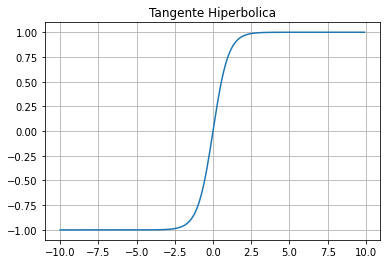

In [ ]:
t = np.arange(-10.0, 10.0, 0.1)
s = np.tanh(t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(title='Tangente Hiperbolica')
ax.grid()

plt.show()

* Función ReLU

Usada como capa de salidad en problemas de regresión con output real positivo.

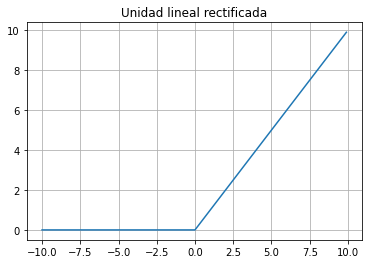

In [ ]:
t = np.arange(-10.0, 10.0, 0.1)
s = np.maximum(t, 0)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(title='Unidad lineal rectificada')
ax.grid()

plt.show()

* Función Sigmoide

Usada como capa de salida en problemas de clasificación multi-etiqueta, para output con 0 y 1

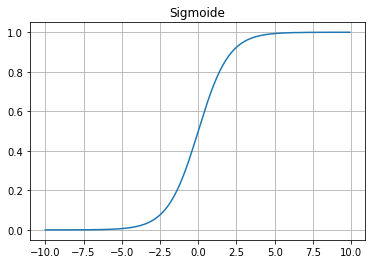

In [ ]:
t = np.arange(-10.0, 10.0, 0.1)
s = 1/(1+np.exp(-t))

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(title='Sigmoide')
ax.grid()

plt.show()

* Función Identidad

Usada como capa de salida en problemas de regresión con output real positivo.

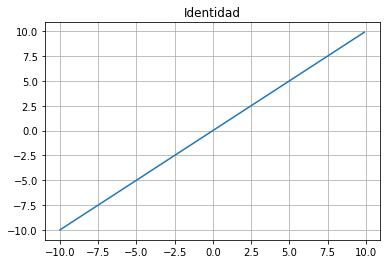

In [ ]:
t = np.arange(-10.0, 10.0, 0.1)
s = t

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(title='Identidad')
ax.grid()

plt.show()

* **Caso especial**: Función Softmax, usada en cada capa de salida para problemas de clasificación multiclases. Actúa sobre todas las neuronas a la vez haciendo que la suma de sus salidas sume 1, emulando una distribución de probabilidad cuyo dominio son las clases.

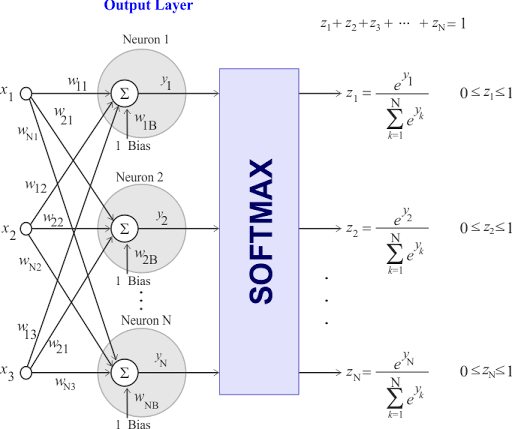

## Función de Perdida
Las Redes Neuronales aprenden mediante una función de pérdida. Es un método para evaluar qué tan bien se modelaron los datos dados. Si las predicciones se desvían demasiado de los resultados reales, la función de pérdida arrojaría un gran número. 

### Recomendaciones:

* En problemas de clasificación binarios, multi-clase y multi-etiqueta se usa **Binary Crossentropy** y **Categorical - Crossentropy** 

*  En problemas de regresión es común usar funciones de perdida como **Mean Square Error (MSE)**

# ¿ Como se entrena una red?

## Elementos necesarios

* Entradas (Inputs): Imagenes, caracteristicas, etc...

* Salidas (Outputs): Etiquetas, valor a predecir, etc...

* Modelo: Una red neuronal (Arquitectura)

### Primera parte: Separar el conjunto de datos en 3

* Entrenamiento (Train)
* Validation (Validación)
* Test (Prueba)

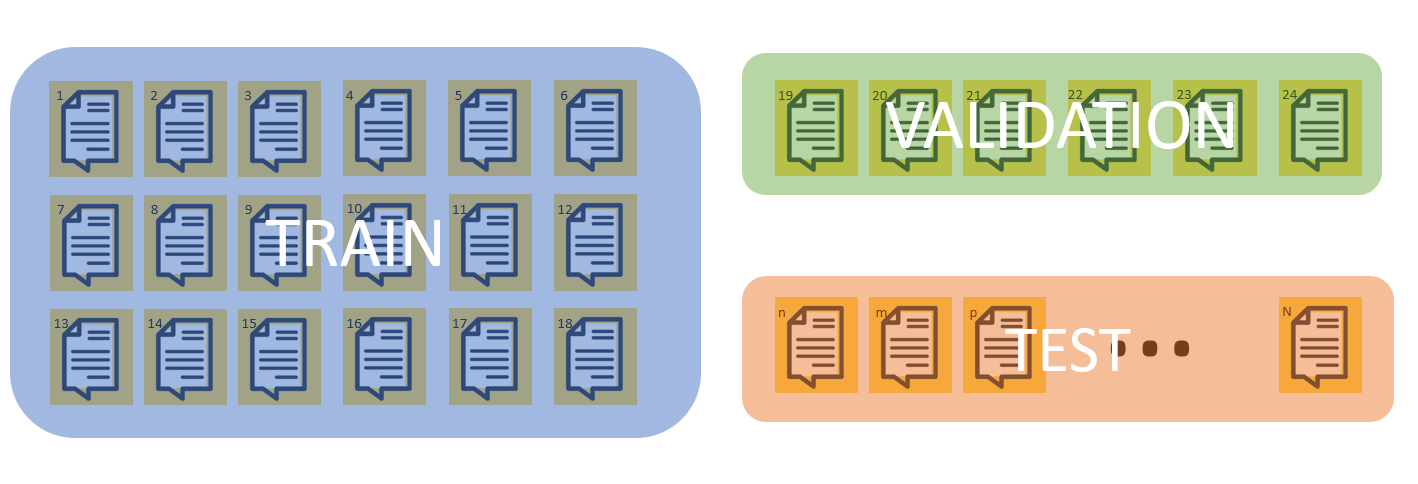

**Importante**: Los 3 sub conjuntos no deben tener datos en común.

* Proporciones usuales:
  * Train (80%), Validation (10%), Test (10%)
  * Train (70%), Validation (15%), Test (15%)

### Segunda Parte: Entrenar el Modelo

En esta sección utilizaremos los conjuntos de Entrenamiento y Validación

**Importante:** Elegir adecuados hiperparámetros dependiendo del problema (función de pérdida, función de activación de la última capa).

#### ¿Cómo se entregan los datos en el proceso de entrenamiento a la Red?

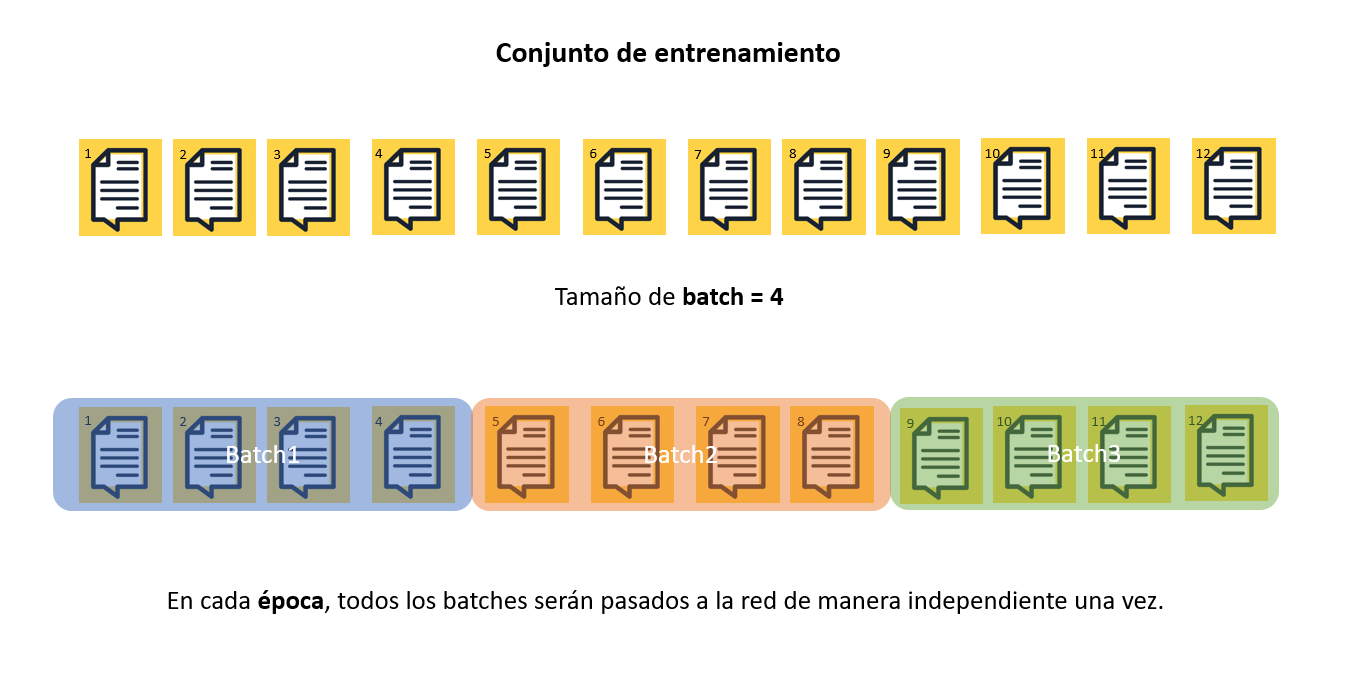

Cada época consiste de evaluar cada batch (una vez) sobre la red y actualizar los pesos de esta.

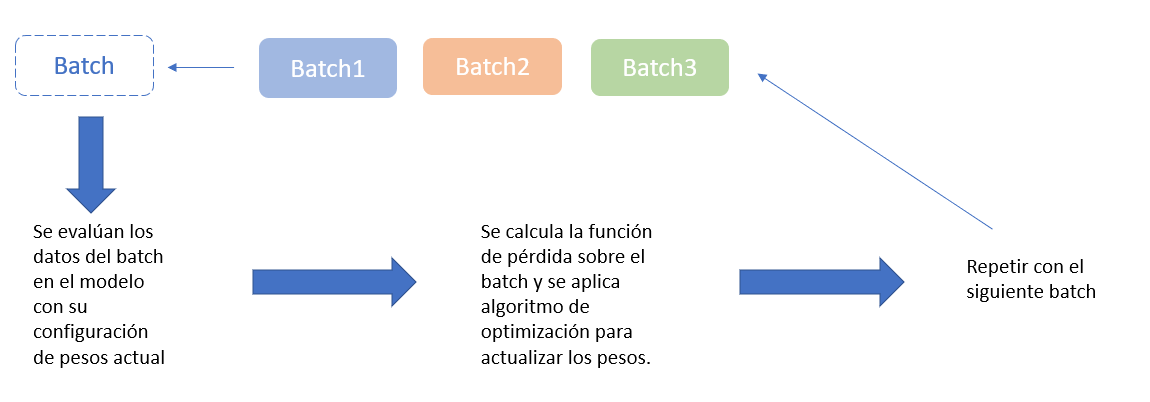

Los entrenamientos consisten de varias épocas, lo usual es considerar al menos 20 épocas.


#### ¿Como funciona la validación?

Al final de una **época** el conjunto de validación es evaluado en la red, se calcula la pérdida y otras métricas de interés.



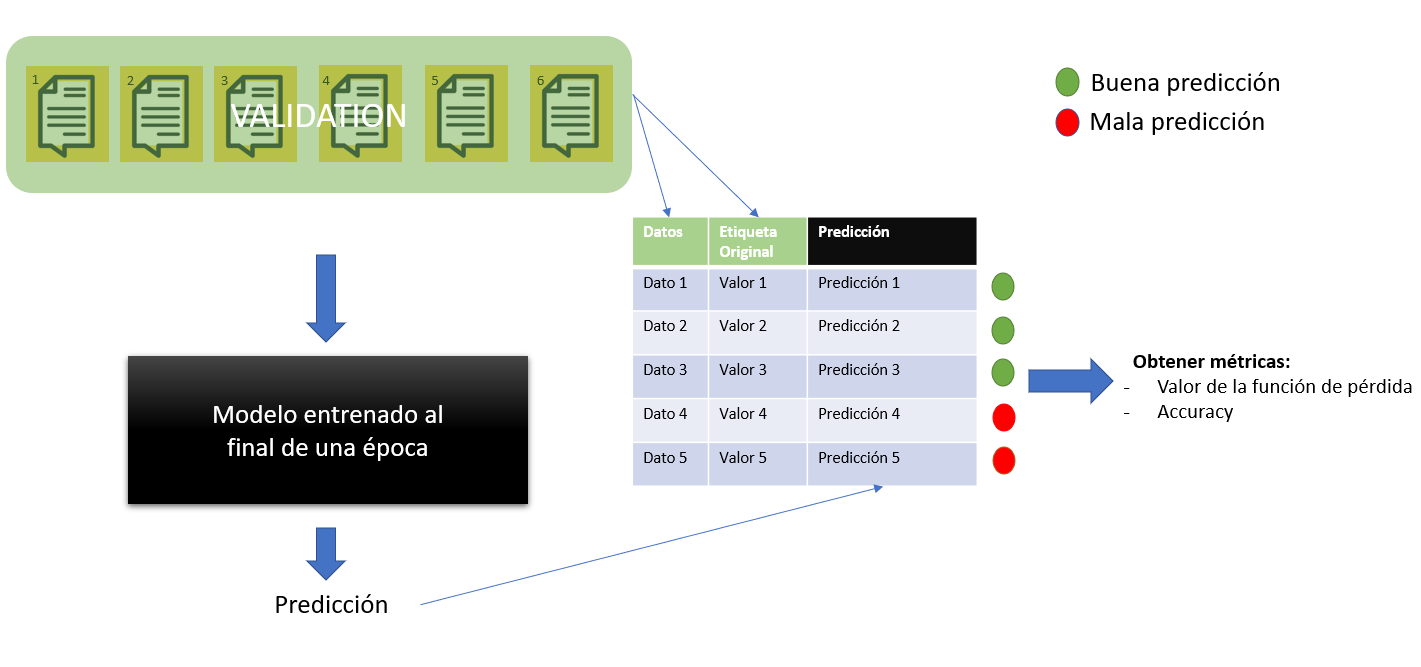

#### Una época
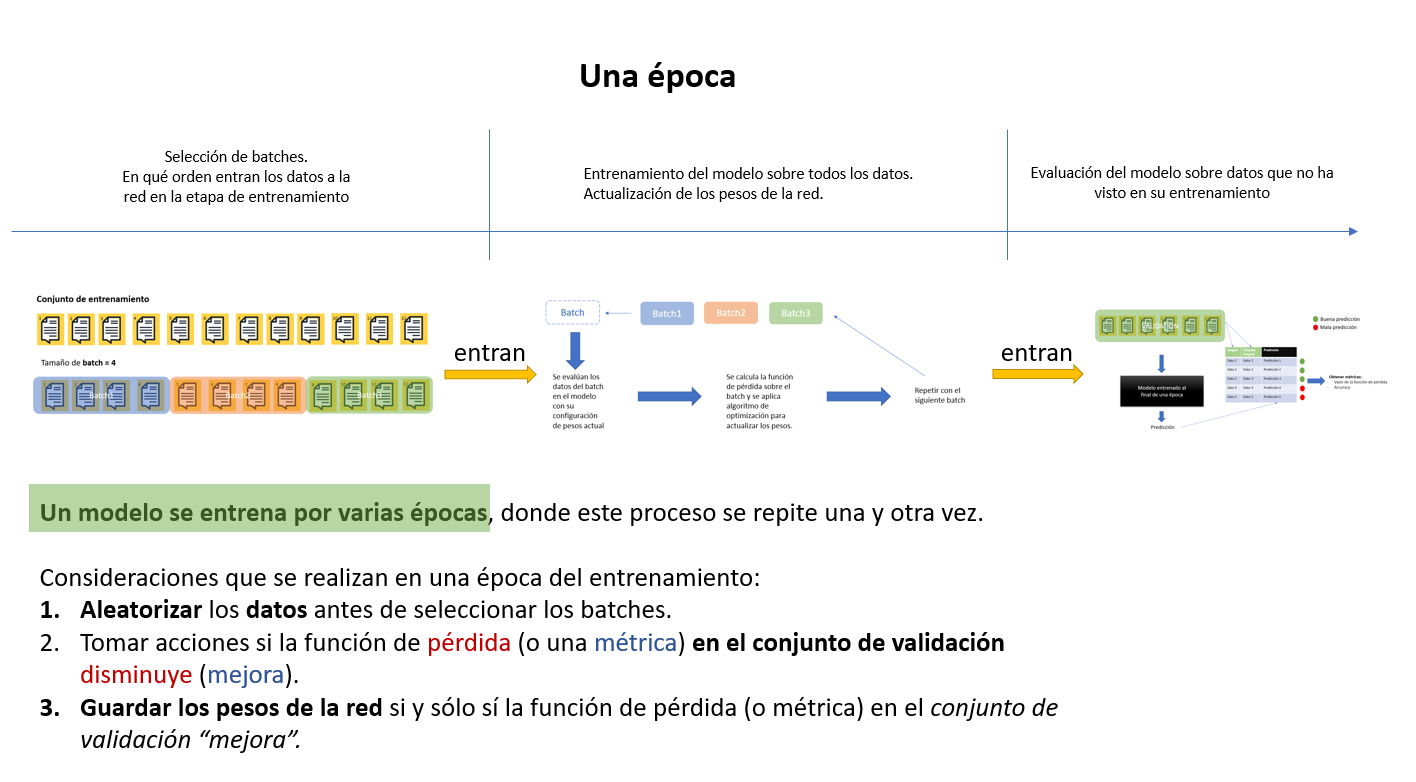

#### ¿Cómo funciona el entrenamiento?


##### Datos

Los elementos principales relacionados a los datos que encontramos en un entrenamiento son: 
* Épocas
* Batches
* Tamaño de Batch (4, 8, 32...)

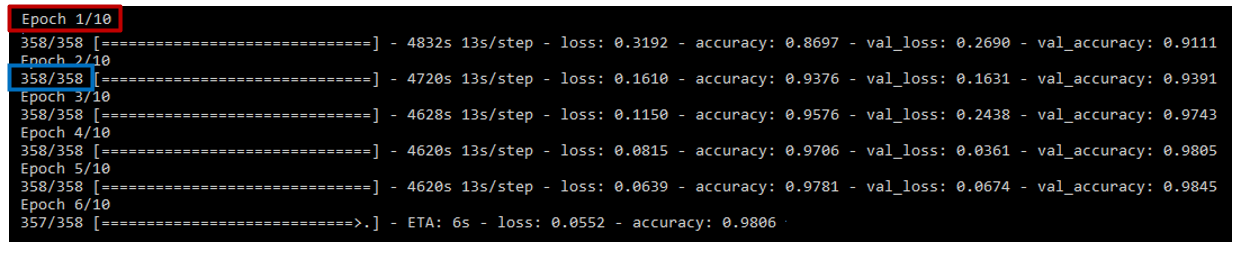

Si el tamaño del batch es 4, aquí tendríamos aproximadamente 4x358 = 1432 Datos en el conjunto de entrenamiento (el último batch tiene entre 1 y 4 Datos)

##### Configuración

Los elementos principales relacionados al entrenamiento de un modelo son:

* Función de pérdida
* Optimizador
* Métricas
* Función de activación en la última capa densa de la red

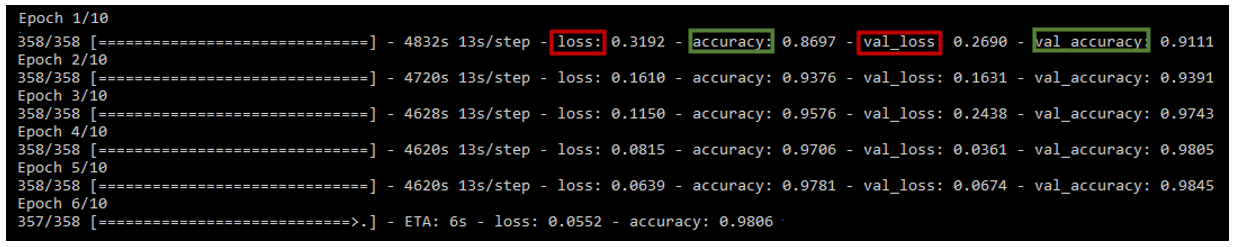

**Observación:** Una función de pérdida también es una métrica, pero en el sentido contrario no siempre se cumple.

### Tercera Parte: Testear el Modelo

Evaluar el modelo en el conjunto de testeo.

* Los datos del conjunto Test son evaluadas en la red ya entrenada.
* Las predicciones de al red son interpretadas y decodificadas en las etiquetas con las que fue entrenada (Ej: '1', '0', 'Perro', '0.223', etc)
* Se obtienen métricas al comparar predicciones del modelo (decodificadas) vs valores reales.

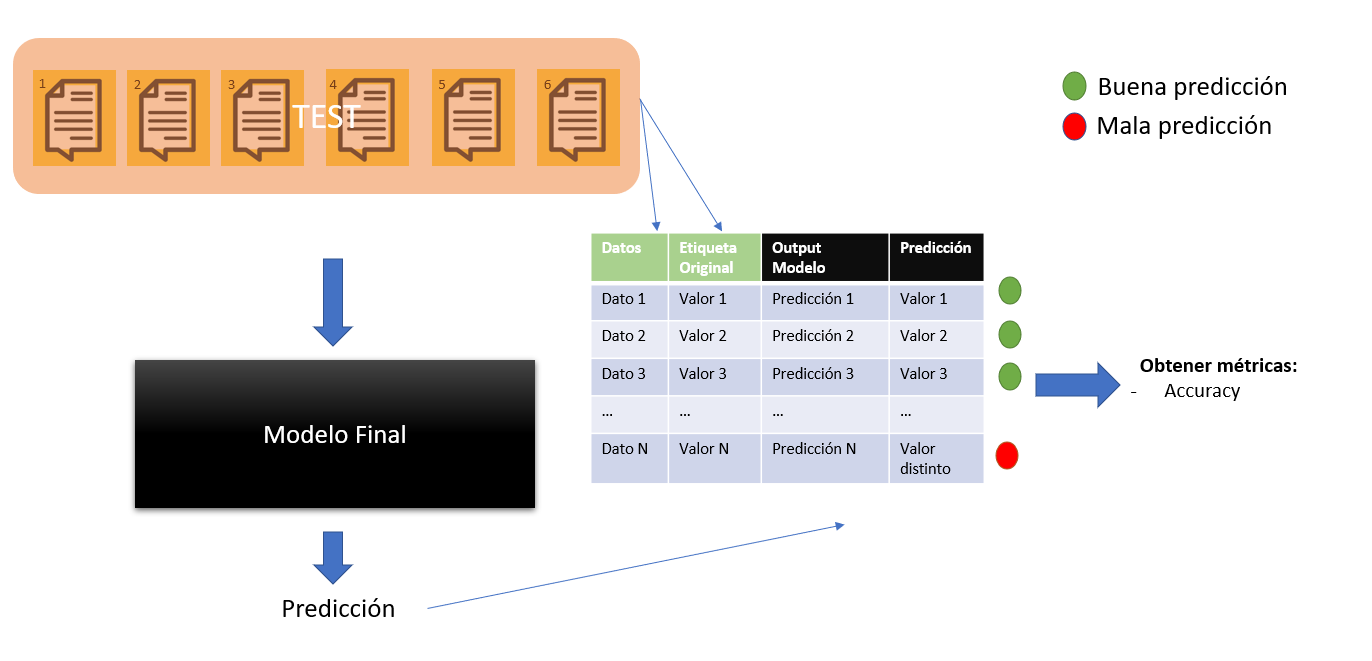

### Imagen Resumen del entrenamiento

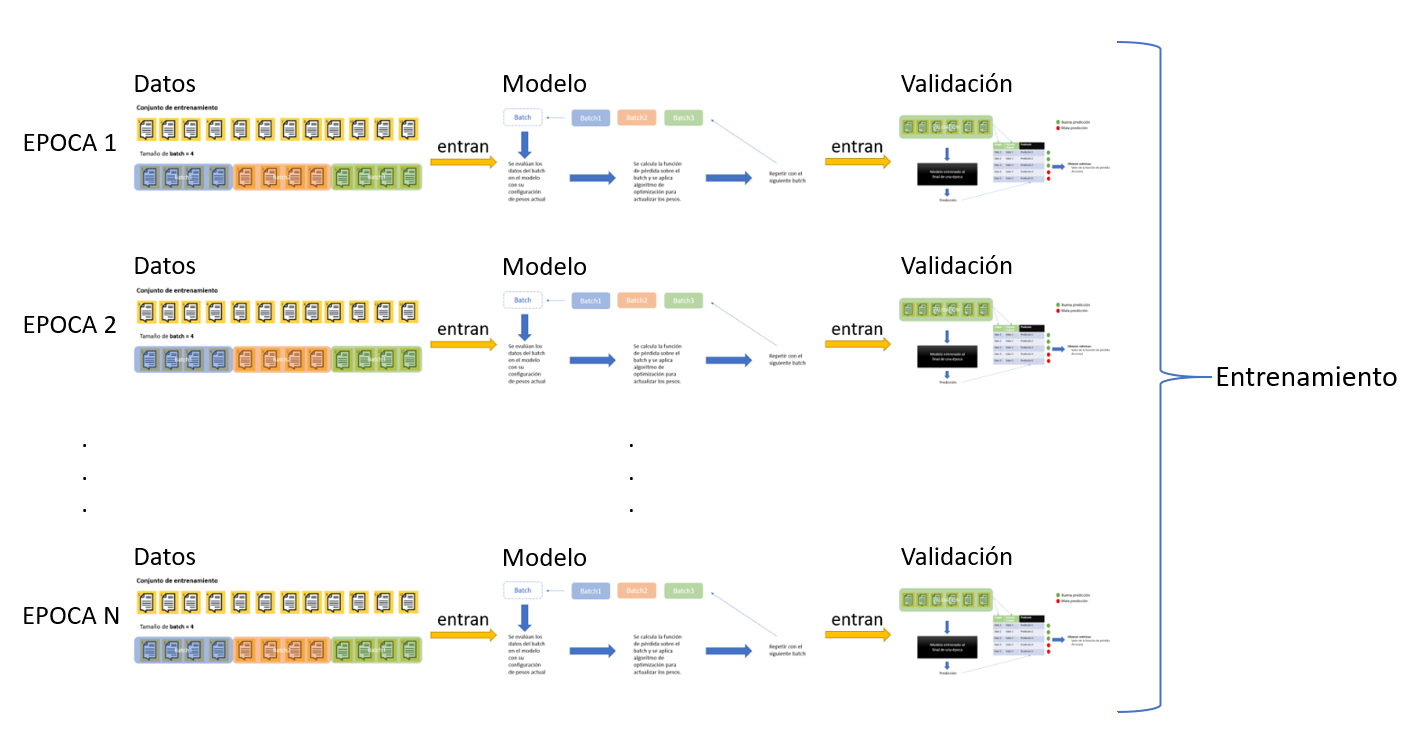

# Tips

* Funciones de pérdida
  * Binario - "binary-crossentropy".
  * Multi-clase - "categorical-crossentropy".
  * Multi-etiqueta - "binary-crossentropy".

* Funciones de activación capa de salida
  * Binario - "Softmax" con dos neuronas, "Sigmoide" con una neurona.
  * Multi-clase - "Softmax", de la salida se elije el argmax
  * Multi-etiqueta - "Sigmoide", cada salida se aproxima con un umbral.

# Glosario



* Batch: subconjunto del conjunto de entrenamiento. Usado para entrenar el modelo. Dependiento
del tamaño de los datos, este usualmente toma tamaños que van desde n=2 hasta n=128.

* Clasificación binaria: dos etiquetas – una posible (Ej: Perro vs gato). Se suele abordar con capas de
salida de una neurona + función de activación sigmoid, o con dos neuronas + función de activación
softmax.
* Clasificación multi-clase: varias etiquetas – una posible (Ej: problema de dígitos).
* Clasificación multi-etiqueta: varias etiquetas – varias posibles (Ej: de un conjunto de fotos de ropa, podriamos obtener pantalon-rojo, chaqueta-azul, etc).

* Época: etapa del entrenamiento compuesta por la selección de batches, el entrenamiento
de la red sobre estos datos (una vez), y la posterior validación del modelo.

* Métrica: función que permite comparar , se diferencia de la función de pérdida en que esta
no es usada para actualizar nada del modelo, sólo para conocer la performance de este
bajo la métrica definida.

* Pérdida: función que permite comparar el output de la red con el output real, esta se
utiliza para decidir si actualizar o no los pesos de la red en la etapa de entrenamiento.